In [1]:
!pip install networkx matplotlib seaborn numpy pandas --silent


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --silent


In [2]:
import statistics
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import collections
import pandas as pd

In [3]:
data_path = "data/facebook_combined.txt"
pd.read_csv(data_path, sep=" ", header=None).head()

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## Clasificación de Grafos

### Tipos de Grafos

1. **Dirigido vs No-Dirigido**:
   - **No-Dirigido**: Las aristas no tienen dirección (A-B = B-A)
   - **Dirigido**: Las aristas tienen dirección (A→B ≠ B→A)

2. **Simple vs Múltiple**:
   - **Simple**: Máximo 1 arista entre dos nodos, sin auto-bucles
   - **Múltiple**: Puede haber múltiples aristas entre los mismos nodos o auto-bucles

In [4]:
# Función para determinar las características de un grafo
def analizar_tipo_grafo(G):
    """
    Analiza y determina el tipo de grafo
    """
    print(f"=== Análisis del Grafo ===")
    print(f"\nNodos: {G.number_of_nodes()}")
    print(f"Aristas: {G.number_of_edges()}")
    
    # 1. DIRIGIDO O NO-DIRIGIDO
    if isinstance(G, nx.DiGraph) or isinstance(G, nx.MultiDiGraph):
        print(f"\n✓ Tipo: DIRIGIDO (las aristas tienen dirección)")
    else:
        print(f"\n✓ Tipo: NO-DIRIGIDO (las aristas no tienen dirección)")
    
    # 2. SIMPLE O MÚLTIPLE
    # Un grafo simple no tiene multi-aristas ni auto-bucles
    tiene_multi_aristas = isinstance(G, (nx.MultiGraph, nx.MultiDiGraph))
    tiene_self_loops = any(u == v for u, v in G.edges())
    
    if tiene_multi_aristas or tiene_self_loops:
        print(f"✓ Tipo: MÚLTIPLE")
        if tiene_multi_aristas:
            print(f"  - Tiene múltiples aristas entre nodos")
        if tiene_self_loops:
            print(f"  - Tiene auto-bucles (self-loops): {list(nx.selfloop_edges(G))}")
    else:
        print(f"✓ Tipo: SIMPLE")
    
    return {
        'dirigido': isinstance(G, (nx.DiGraph, nx.MultiDiGraph)),
        'multiple': tiene_multi_aristas or tiene_self_loops
    }


In [5]:
# Analizar el grafo de Facebook
print("ANÁLISIS DEL GRAFO DE FACEBOOK")
print("="*50)

# Cargar el grafo de Facebook
G_facebook = nx.read_edgelist(data_path)

# Analizar tipo
resultado = analizar_tipo_grafo(G_facebook)

ANÁLISIS DEL GRAFO DE FACEBOOK
=== Análisis del Grafo ===

Nodos: 4039
Aristas: 88234

✓ Tipo: NO-DIRIGIDO (las aristas no tienen dirección)
✓ Tipo: SIMPLE


## Cálculo del Grado Medio

Dado que el grafo es **NO-DIRIGIDO**, calculamos el **grado medio** (no distinguimos entre grado de entrada y salida).

**Fórmula**: 
$$\text{Grado medio} = \frac{2 \times \text{número de aristas}}{\text{número de nodos}} = \frac{\sum_{v \in V} \text{grado}(v)}{|V|}$$

In [12]:
# Calcular el grado medio para grafo NO-DIRIGIDO
print("="*60)
print("CÁLCULO DEL GRADO MEDIO")
print("="*60)

# En un grafo no-dirigido, el grado medio se calcula como:
# Método 1: Usar la fórmula: 2 * |E| / |V|
num_nodos = G_facebook.number_of_nodes()
num_aristas = G_facebook.number_of_edges()
grado_medio = (2 * num_aristas) / num_nodos

print(f"\nNúmero de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")
print(f"\n✓ Grado medio: {grado_medio:.4f}")

# Método 2: Calcular directamente desde los grados
grados = [grado for nodo, grado in G_facebook.degree()]
grado_medio_alt = sum(grados) / len(grados)

print(f"  (Verificación): {grado_medio_alt:.4f}")

# Estadísticas adicionales del grado
print(f"\nEstadísticas de grado:")
print(f"  - Grado mínimo: {min(grados)}")
print(f"  - Grado máximo: {max(grados)}")
print(f"  - Grado mediano: {statistics.median(grados):.1f}")
print(f"  - Desviación estándar: {statistics.stdev(grados):.2f}")

print("\n" + "="*60)
print("Interpretación:")
print(f"En promedio, cada usuario tiene {grado_medio:.1f} amigos.")
print("="*60)

CÁLCULO DEL GRADO MEDIO

Número de nodos: 4039
Número de aristas: 88234

✓ Grado medio: 43.6910
  (Verificación): 43.6910

Estadísticas de grado:
  - Grado mínimo: 1
  - Grado máximo: 1045
  - Grado mediano: 25.0
  - Desviación estándar: 52.42

Interpretación:
En promedio, cada usuario tiene 43.7 amigos.


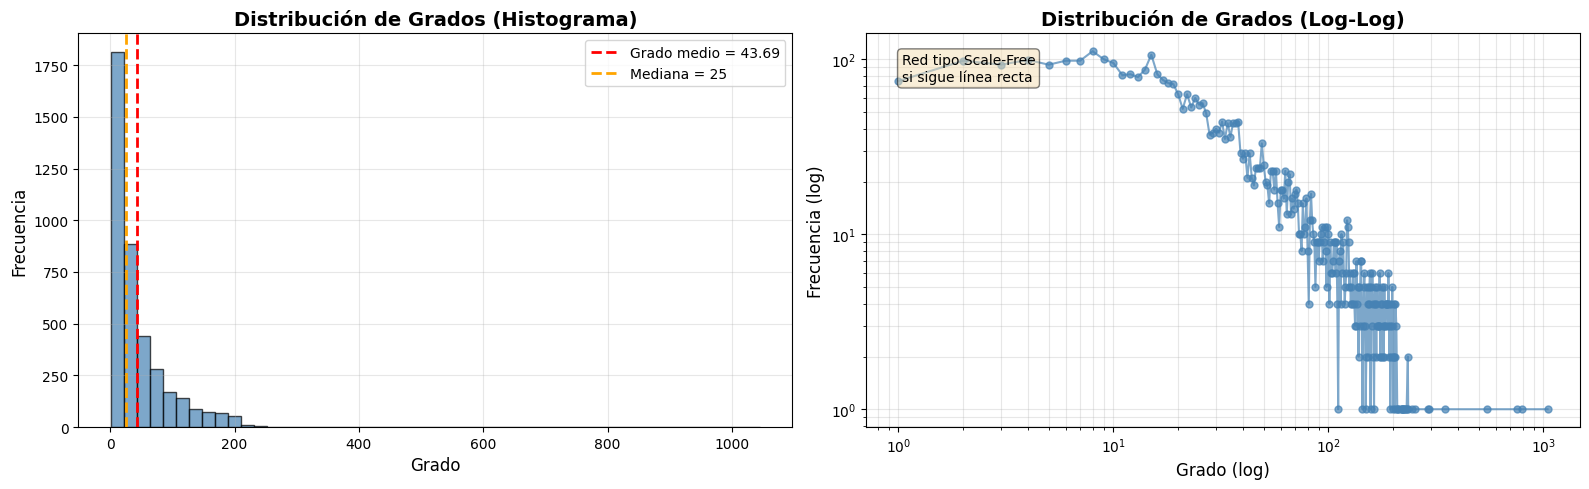


💡 Observaciones:
- Si el gráfico log-log muestra una línea recta, la red sigue una distribución power-law
- Esto indicaría que es una red 'scale-free' con algunos nodos muy conectados (hubs)
- El nodo más conectado tiene 1045 conexiones, mientras el promedio es 43.7


In [13]:
# Visualizar la distribución de grados
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Histograma de grados
axes[0].hist(grados, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(grado_medio, color='red', linestyle='--', linewidth=2, label=f'Grado medio = {grado_medio:.2f}')
axes[0].axvline(statistics.median(grados), color='orange', linestyle='--', linewidth=2, label=f'Mediana = {statistics.median(grados):.0f}')
axes[0].set_xlabel('Grado', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Grados (Histograma)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución de grados en escala log-log
degree_sequence = sorted([d for n, d in G_facebook.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*sorted(degree_count.items()))

axes[1].loglog(deg, cnt, 'o-', color='steelblue', markersize=5, alpha=0.7)
axes[1].set_xlabel('Grado (log)', fontsize=12)
axes[1].set_ylabel('Frecuencia (log)', fontsize=12)
axes[1].set_title('Distribución de Grados (Log-Log)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, which='both')
axes[1].text(0.05, 0.95, 'Red tipo Scale-Free\nsi sigue línea recta', 
             transform=axes[1].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n💡 Observaciones:")
print("- Si el gráfico log-log muestra una línea recta, la red sigue una distribución power-law")
print("- Esto indicaría que es una red 'scale-free' con algunos nodos muy conectados (hubs)")
print(f"- El nodo más conectado tiene {max(grados)} conexiones, mientras el promedio es {grado_medio:.1f}")

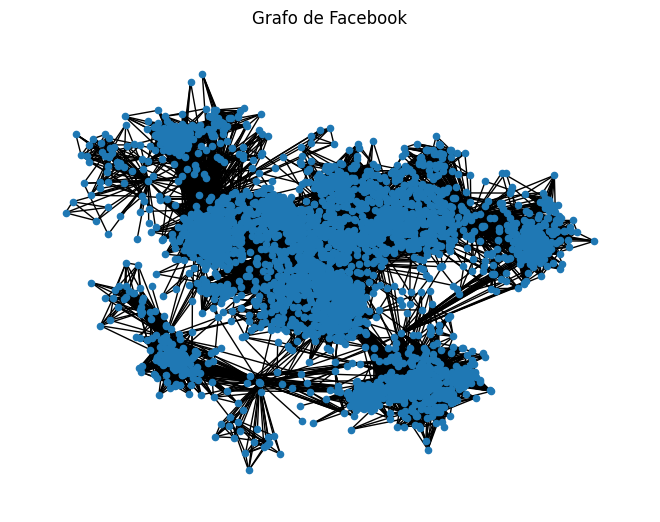

In [6]:
nx.draw(G_facebook, node_size=20, with_labels=False)
plt.title("Grafo de Facebook")
plt.show()

## Visualización de Grafos: Comparación de Layouts

Cada layout se calcula y visualiza de forma independiente. Ejecuta las celdas una por una para comparar los resultados.

**Tipos de layouts disponibles:**
- **Spring Layout**: Mejor calidad visual, MUY lento (~1-2 min)
- **Kamada-Kawai**: ⚠️ MUY LENTO para grafos grandes (puede tardar varios minutos)
- **Circular**: Muy rápido, disposición circular
- **Spectral**: ⭐ **RECOMENDADO** - Rápido y buena calidad visual
- **Shell**: Muy rápido, disposición en capas

### 1. Spring Layout (Fruchterman-Reingold)

Calculando Spring Layout... ✓ 35.42s


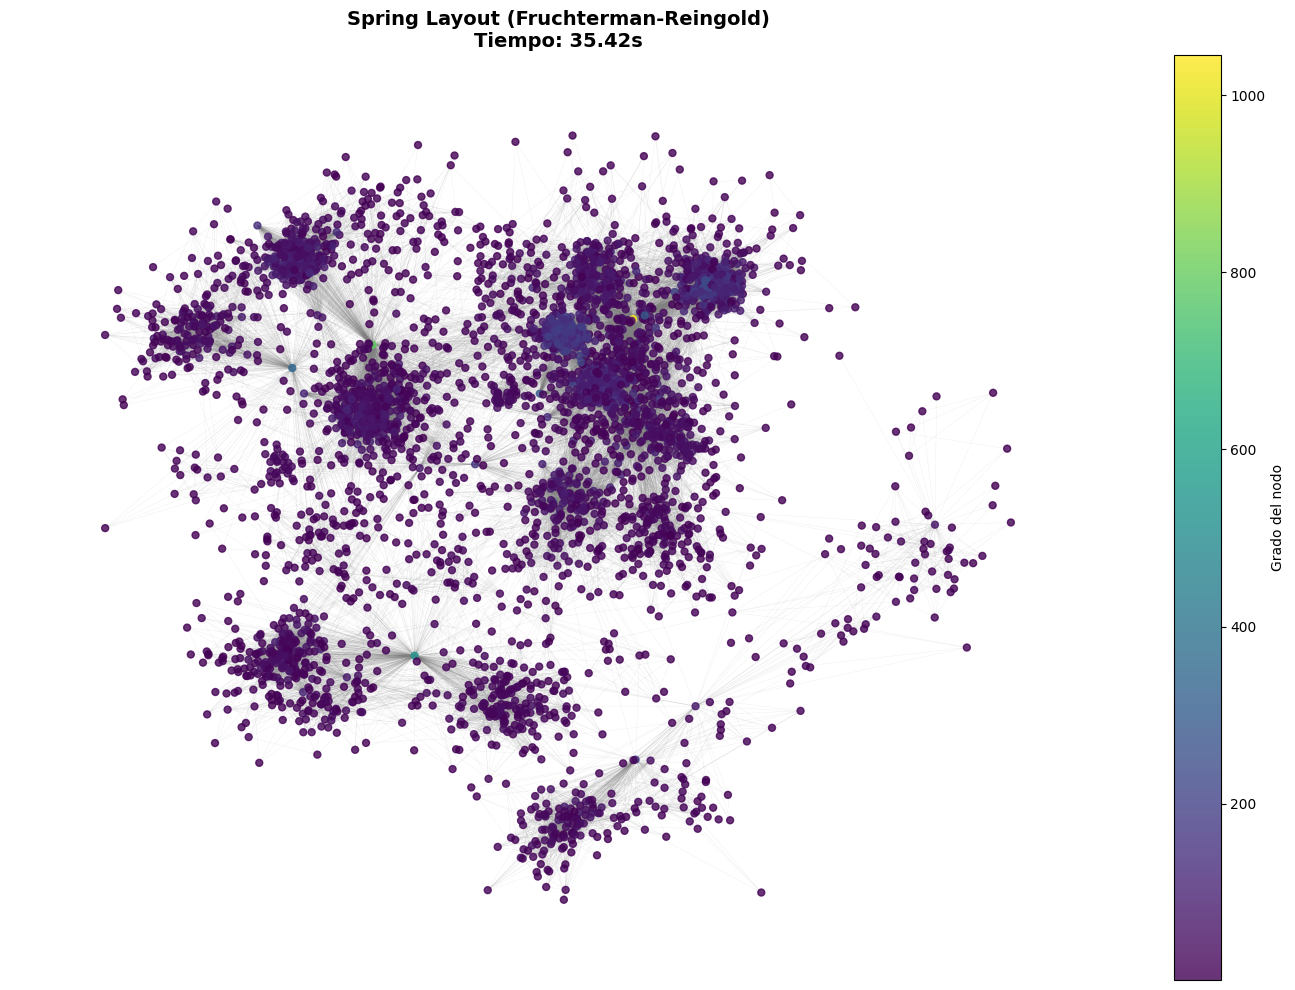

In [7]:
import time

# Calcular layout
print("Calculando Spring Layout...", end=" ", flush=True)
inicio = time.time()
pos = nx.spring_layout(G_facebook, iterations=50, seed=42)
tiempo = time.time() - inicio
print(f"✓ {tiempo:.2f}s")

# Visualizar
plt.figure(figsize=(14, 10))

# Dibujar aristas
nx.draw_networkx_edges(G_facebook, pos, width=0.2, alpha=0.2, edge_color='gray')

# Dibujar nodos con color según grado
node_colors = [G_facebook.degree(node) for node in G_facebook.nodes()]
nodes = nx.draw_networkx_nodes(G_facebook, pos, 
                               node_size=25,
                               node_color=node_colors,
                               cmap='viridis',
                               alpha=0.8)

plt.colorbar(nodes, label='Grado del nodo')
plt.title(f'Spring Layout (Fruchterman-Reingold)\nTiempo: {tiempo:.2f}s', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show() 

### 2. Kamada-Kawai Layout ⚠️ MUY LENTO (Puedes saltar esta celda)

**Recomendación**: Usa **Spectral Layout** en su lugar.
**Advertencia**: Este algoritmo tiene complejidad O(n³) y puede tardar varios minutos con 4000+ nodos. 

In [8]:
import time

# Calcular layout
print("Calculando Kamada-Kawai Layout...", end=" ", flush=True)
inicio = time.time()
pos = nx.kamada_kawai_layout(G_facebook)
tiempo = time.time() - inicio
print(f"✓ {tiempo:.2f}s")

# Visualizar
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(G_facebook, pos, width=0.2, alpha=0.2, edge_color='gray')

node_colors = [G_facebook.degree(node) for node in G_facebook.nodes()]
nodes = nx.draw_networkx_nodes(G_facebook, pos, 
                               node_size=25,
                               node_color=node_colors,
                               cmap='plasma',
                               alpha=0.8)

plt.colorbar(nodes, label='Grado del nodo')
plt.title(f'Kamada-Kawai Layout (Mejor balance)\nTiempo: {tiempo:.2f}s', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show() 

Calculando Kamada-Kawai Layout... 

KeyboardInterrupt: 

---

💡 **如果上面的Kamada-Kawai太慢，直接跳过，运行下面的Spectral Layout！**

---

### 3. Circular Layout

Calculando Circular Layout... ✓ 0.00s


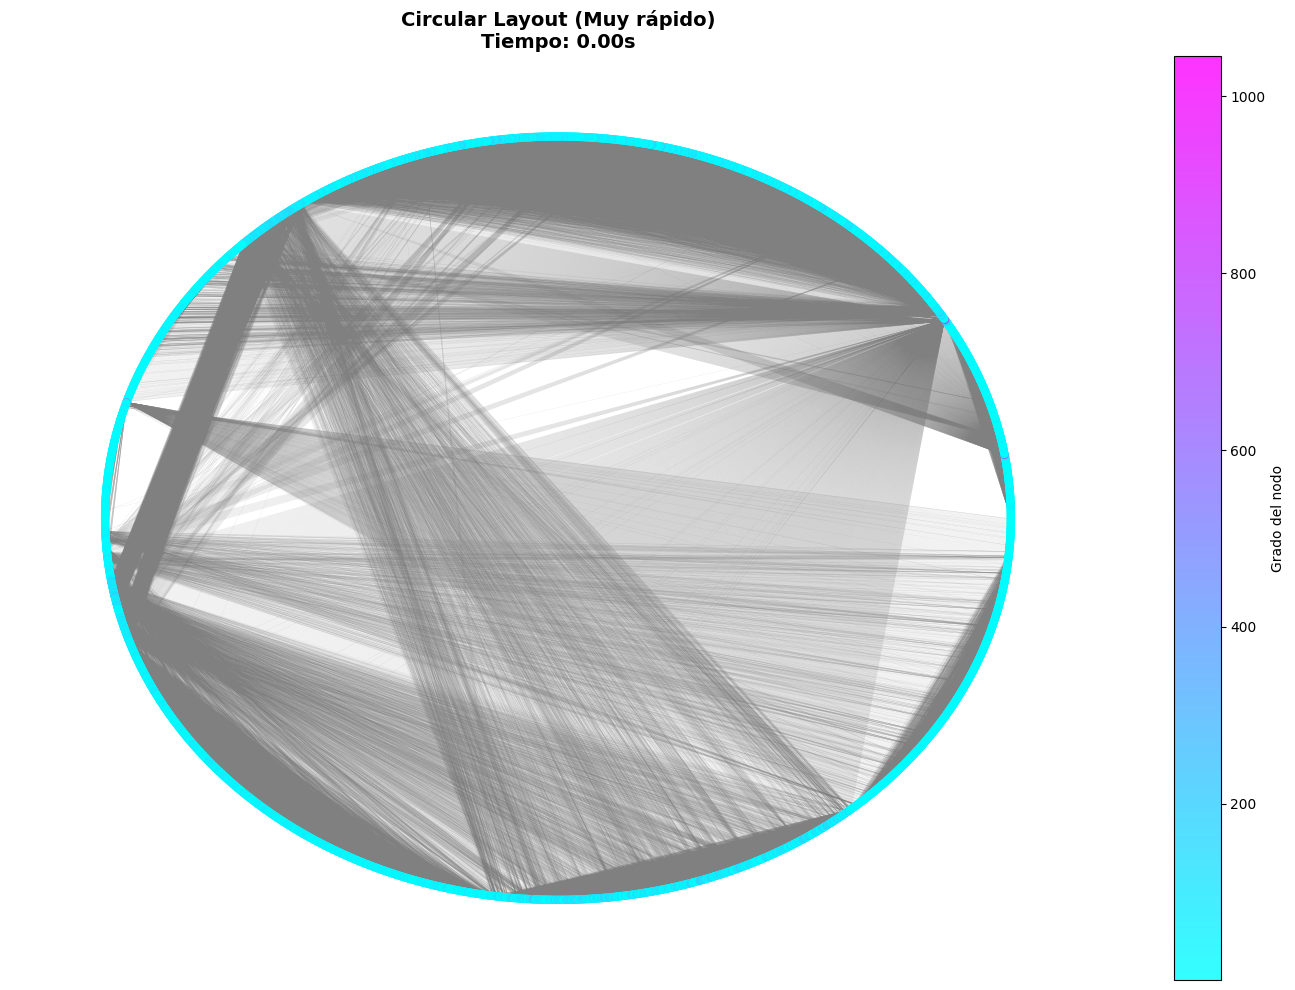

In [9]:
import time

# Calcular layout
print("Calculando Circular Layout...", end=" ", flush=True)
inicio = time.time()
pos = nx.circular_layout(G_facebook)
tiempo = time.time() - inicio
print(f"✓ {tiempo:.2f}s")

# Visualizar
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(G_facebook, pos, width=0.2, alpha=0.2, edge_color='gray')

node_colors = [G_facebook.degree(node) for node in G_facebook.nodes()]
nodes = nx.draw_networkx_nodes(G_facebook, pos, 
                               node_size=25,
                               node_color=node_colors,
                               cmap='cool',
                               alpha=0.8)

plt.colorbar(nodes, label='Grado del nodo')
plt.title(f'Circular Layout (Muy rápido)\nTiempo: {tiempo:.2f}s', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show() 

### 4. Spectral Layout ⭐ RECOMENDADO (Rápido y buena calidad)

Calculando Spectral Layout... ✓ 1.38s


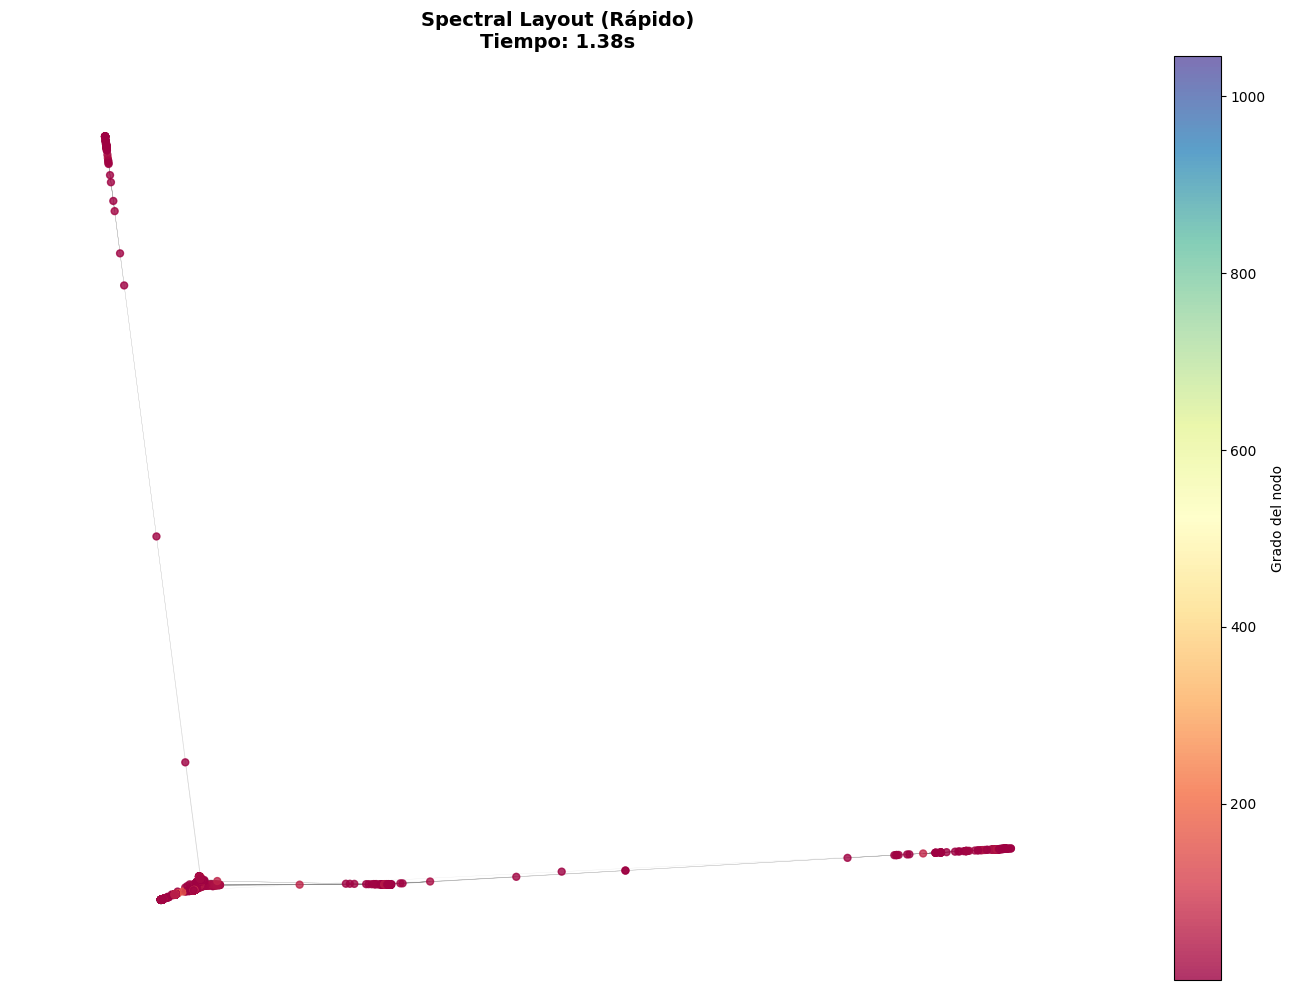

In [10]:
import time

# Calcular layout
print("Calculando Spectral Layout...", end=" ", flush=True)
inicio = time.time()
pos = nx.spectral_layout(G_facebook)
tiempo = time.time() - inicio
print(f"✓ {tiempo:.2f}s")

# Visualizar
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(G_facebook, pos, width=0.2, alpha=0.2, edge_color='gray')

node_colors = [G_facebook.degree(node) for node in G_facebook.nodes()]
nodes = nx.draw_networkx_nodes(G_facebook, pos, 
                               node_size=25,
                               node_color=node_colors,
                               cmap='Spectral',
                               alpha=0.8)

plt.colorbar(nodes, label='Grado del nodo')
plt.title(f'Spectral Layout (Rápido)\nTiempo: {tiempo:.2f}s', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show() 

### 5. Shell Layout

Calculando Shell Layout... ✓ 0.00s


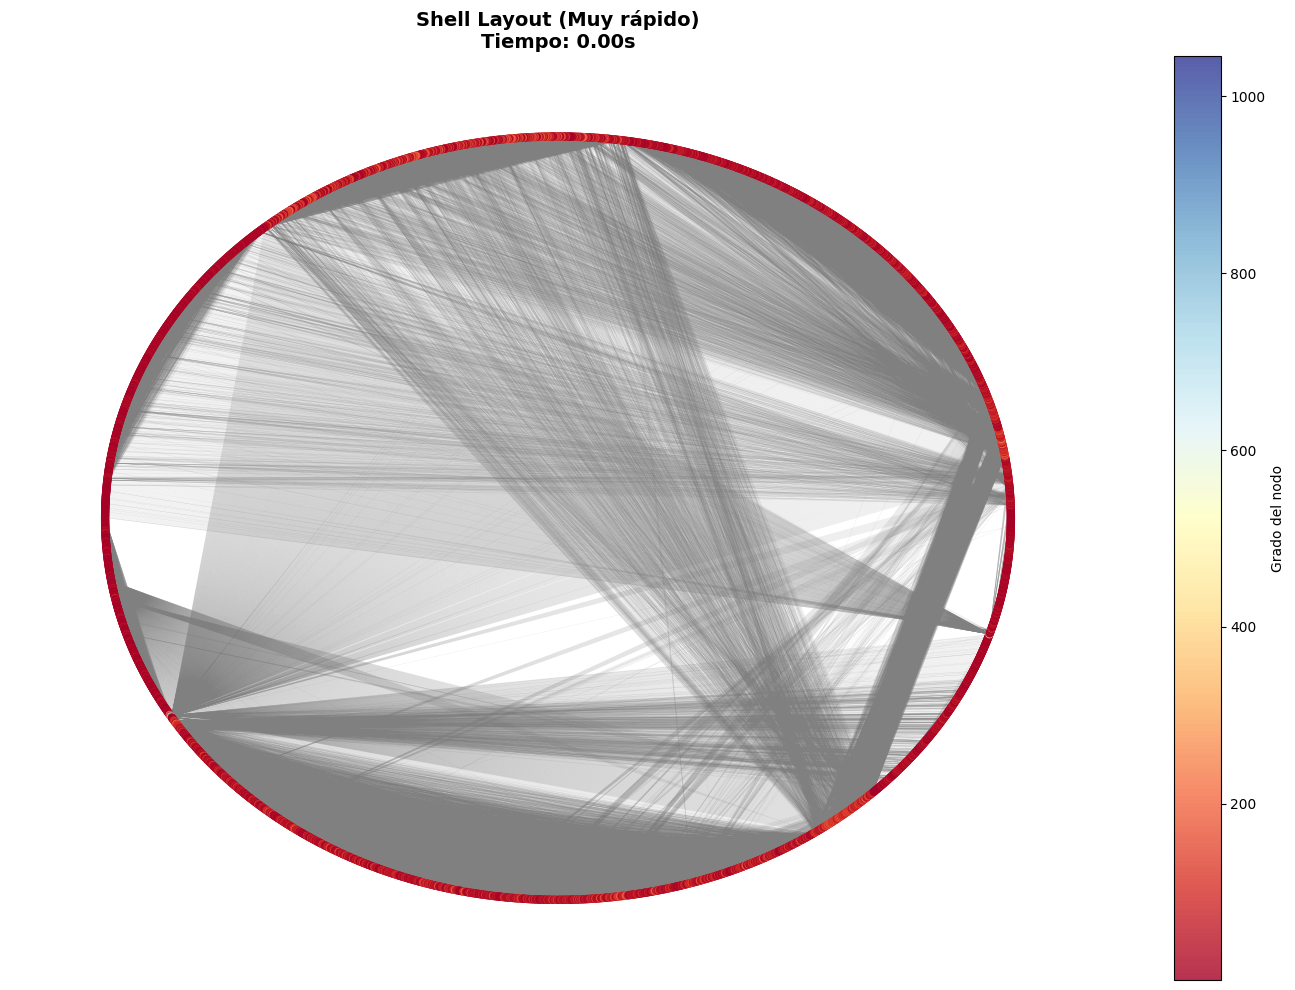

In [11]:
import time

# Calcular layout
print("Calculando Shell Layout...", end=" ", flush=True)
inicio = time.time()
pos = nx.shell_layout(G_facebook)
tiempo = time.time() - inicio
print(f"✓ {tiempo:.2f}s")

# Visualizar
plt.figure(figsize=(14, 10))

nx.draw_networkx_edges(G_facebook, pos, width=0.2, alpha=0.2, edge_color='gray')

node_colors = [G_facebook.degree(node) for node in G_facebook.nodes()]
nodes = nx.draw_networkx_nodes(G_facebook, pos, 
                               node_size=25,
                               node_color=node_colors,
                               cmap='RdYlBu',
                               alpha=0.8)

plt.colorbar(nodes, label='Grado del nodo')
plt.title(f'Shell Layout (Muy rápido)\nTiempo: {tiempo:.2f}s', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show() 

### 💡 如何选择Layout？

根据上面的可视化结果，你可以比较：

| Layout | 速度 | 适用场景 |
|--------|------|---------|
| **Spring** | ⚠️ 很慢 (1-2分钟) | 深度分析，需要最佳视觉效果 |
| **Kamada-Kawai** | ⚠️ 极慢 (几分钟) | 小型图(<500节点)，不适合大图 |
| **Circular** | ✅ 快 | 快速预览，层次结构 |
| **Spectral** | ⭐ **快且好** | **推荐** - 大图的最佳选择 |
| **Shell** | ✅ 快 | 层次网络，快速可视化 |

**针对4000+节点的Facebook图，推荐使用 Spectral 或 Circular layout。**